In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/reprocessed.hungarian.data', header=None, sep='\s+')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
2,37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48,0,2,-9,308,0,1,-9,-9,2.0,1,-9,-9,0
290,36,1,2,120,166,0,0,180,0,0.0,-9,-9,-9,0
291,48,1,3,110,211,0,0,138,0,0.0,-9,-9,6,0
292,47,0,2,140,257,0,0,135,0,1.0,1,-9,-9,0


In [2]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
2,37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48,0,2,-9,308,0,1,-9,-9,2.0,1,-9,-9,0
290,36,1,2,120,166,0,0,180,0,0.0,-9,-9,-9,0
291,48,1,3,110,211,0,0,138,0,0.0,-9,-9,6,0
292,47,0,2,140,257,0,0,135,0,1.0,1,-9,-9,0


In [ ]:
# 결측치 확인

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Text(0.5, 1.0, 'Distribution of Heart Disease Levels')

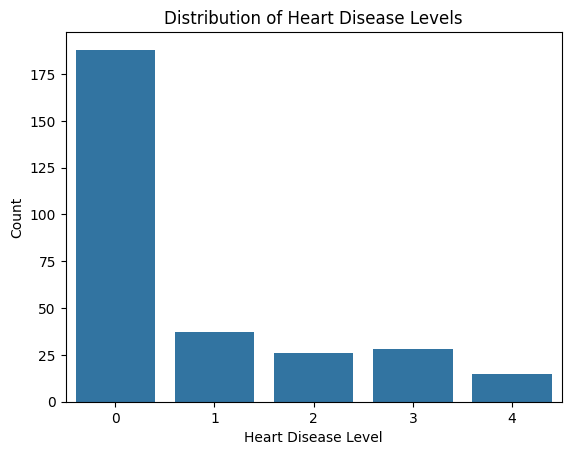

In [ ]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="num")
plt.xlabel('Heart Disease Level')
plt.ylabel("Count")
plt.title('Distribution of Heart Disease Levels')

In [ ]:
# 레이블 갯수 확인 (숫자)
df['num'].value_counts()

0    188
1     37
3     28
2     26
4     15
Name: num, dtype: int64

In [ ]:
X=df.drop('num',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9
1,49,0,3,160,180,0,0,156,0,1.0,2,-9,-9
2,37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9
3,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9
4,54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9


In [ ]:
y=df['num']
y.value_counts()

0    188
1     37
3     28
2     26
4     15
Name: num, dtype: int64

In [ ]:
y.head()

0    0
1    1
2    0
3    3
4    0
Name: num, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1,
                                                    shuffle = True,
                                                    random_state = 21)

In [ ]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)

(260, 5, 13) (260,)
(26, 5, 13) (26,)


In [ ]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

print(y_train_onehot.shape)
print(y_test_onehot.shape)

(260, 5)
(26, 5)


In [ ]:
print(X_train.shape)

(260, 5, 13)


In [ ]:
'''from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense

X_train_padded = pad_sequences(X_train, maxlen=30, padding='post', truncating='post')
print(X_train_padded.shape)
print(X_train.shape)'''

"from tensorflow.keras.preprocessing.sequence import pad_sequences\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense\n\nX_train_padded = pad_sequences(X_train, maxlen=30, padding='post', truncating='post')\nprint(X_train_padded.shape)\nprint(X_train.shape)"

In [ ]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

In [ ]:
# define model

from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, LSTM, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling1D, TimeDistributed, LSTM, BatchNormalization, Input, concatenate, Conv1D


model = Sequential()
model.add(Conv1D(filters=64,
                 kernel_size=3, activation='relu',
                 input_shape=(n_timesteps, n_features),padding='same'))
model.add(Dropout(0.5))

model.add(Conv1D(filters=128,
                 kernel_size=3, activation='relu',padding='same'))
model.add(Dropout(0.5))

model.add(Conv1D(filters=256,
                 kernel_size=3, activation='relu',padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(keras.layers.Flatten())
model.add(Dropout(0.5))
model.add(Dense(100,
                activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 64)             2560      
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 128)            24704     
                                                                 
 dropout_1 (Dropout)         (None, 5, 128)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 5, 256)            98560     
                                                                 
 dropout_2 (Dropout)         (None, 5, 256)            0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 2, 256)            0

In [ ]:
model.layers

In [ ]:
# 가중치와 절편 확인

conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 13, 64) (64,)


In [ ]:
# weights 속성을 numpy 배열로 변환

conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.0021945615 0.09233113


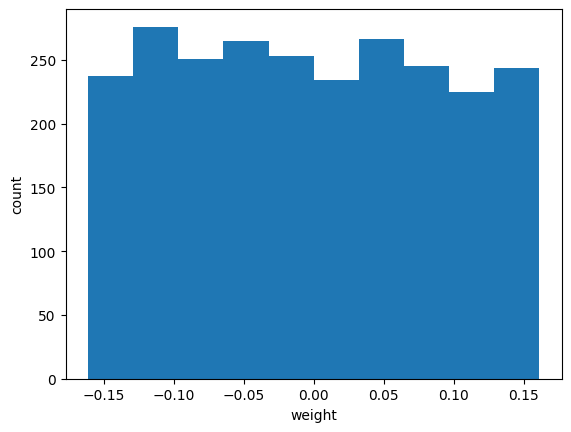

In [ ]:
# 가중치의 분포를 히스토그램으로 작성
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

In [ ]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,
                    validation_split=0.1, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
8/8 [==============================] - 1s 188ms/step - loss: 1.4849 - accuracy: 0.5000 - val_loss: 1.4939 - val_accuracy: 0.7308
Epoch 2/30
1/8 [==>...........................] - ETA: 0s - loss: 1.3674 - accuracy: 0.6875

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 33ms/step - loss: 1.5448 - accuracy: 0.5128 - val_loss: 1.4951 - val_accuracy: 0.7692
Epoch 3/30
8/8 [==============================] - 0s 27ms/step - loss: 1.5544 - accuracy: 0.5385 - val_loss: 1.5003 - val_accuracy: 0.7692
Epoch 4/30
8/8 [==============================] - 0s 33ms/step - loss: 1.4432 - accuracy: 0.5641 - val_loss: 1.4930 - val_accuracy: 0.7692
Epoch 5/30
8/8 [==============================] - 0s 33ms/step - loss: 1.3998 - accuracy: 0.5556 - val_loss: 1.4846 - val_accuracy: 0.7692
Epoch 6/30
8/8 [==============================] - 0s 30ms/step - loss: 1.4506 - accuracy: 0.5769 - val_loss: 1.4821 - val_accuracy: 0.7692
Epoch 7/30
8/8 [==============================] - 0s 31ms/step - loss: 1.4424 - accuracy: 0.5085 - val_loss: 1.4716 - val_accuracy: 0.7692
Epoch 8/30
8/8 [==============================] - 0s 34ms/step - loss: 1.4352 - accuracy: 0.5427 - val_loss: 1.4620 - val_accuracy: 0.7692
Epoch 9/30
8/8 [======================

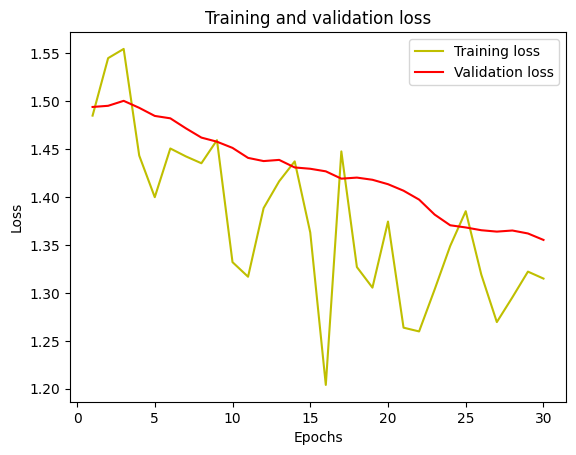

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

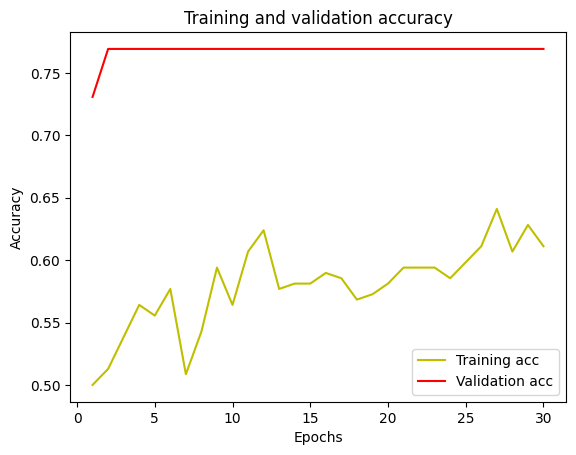

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

1/1 [==============================] - 0s 139ms/step


In [ ]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73        15
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2

    accuracy                           0.58        26
   macro avg       0.12      0.20      0.15        26
weighted avg       0.33      0.58      0.42        26

[[15  0  0  0  0]
 [ 3  0  0  0  0]
 [ 5  0  0  0  0]
 [ 1  0  0  0  0]
 [ 2  0  0  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
